In [51]:
479 + 177 + 169 + 1235 + 124 + 229 + 157 + 950

3520

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from scipy import stats
import os
from glob import glob
import nibabel as ni
from sklearn import cluster
import itertools
import statsmodels.

In [2]:
rois = pandas.read_csv('/Users/jakevogel/Science/tau/progression/ADNI_subs_lund_30_32.csv')
rois.index = rois[:][rois.columns[0]]
rois.drop(rois.columns[0],axis=1,inplace=True)

In [3]:
rois.head()

,lund_30_32_1.0,lund_30_32_2.0,lund_30_32_3.0,lund_30_32_4.0,lund_30_32_5.0,lund_30_32_6.0,lund_30_32_7.0,lund_30_32_8.0,lund_30_32_9.0,lund_30_32_10.0,...,lund_30_32_23.0,lund_30_32_24.0,lund_30_32_25.0,lund_30_32_26.0,lund_30_32_27.0,lund_30_32_28.0,lund_30_32_29.0,lund_30_32_30.0,lund_30_32_31.0,lund_30_32_32.0
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
128-S-2002,1.165246,1.356971,1.069195,1.156440,1.045650,1.034803,0.994130,0.981744,0.976063,1.002771,...,1.108982,1.055838,0.955043,1.019365,1.063252,0.929154,1.119492,0.939913,0.995117,0.831245
019-S-4835,1.002144,1.505642,1.122238,1.068962,0.966168,1.102181,0.773391,0.961614,0.953925,1.042813,...,1.194508,1.082580,0.936083,1.149250,1.061777,0.902096,1.075951,1.003214,0.979701,0.854410
127-S-4604,1.122230,1.563536,1.220622,1.207900,0.982433,1.022375,0.917109,1.059099,1.053220,0.996358,...,1.193206,1.094479,1.001125,1.123395,1.105133,0.987766,1.279792,1.005741,1.229601,0.909474
019-S-4367,0.985231,1.201336,1.030506,1.016262,0.964408,1.044487,0.799125,0.920707,0.989368,0.992673,...,1.044806,1.037811,0.967231,0.972483,0.957746,0.892728,0.964934,1.003750,0.927455,0.873573
018-S-4313,1.068195,1.560548,1.291598,1.195996,1.103314,1.316423,0.880481,1.088236,1.098433,1.185737,...,1.335077,1.247027,1.086750,1.285259,1.157402,1.020581,1.208571,1.150122,1.086024,1.050057


In [4]:
jnk = deepcopy(rois)
jnk['sum'] = rois.sum(axis=1)
jnk.loc['sum'] = rois.sum()

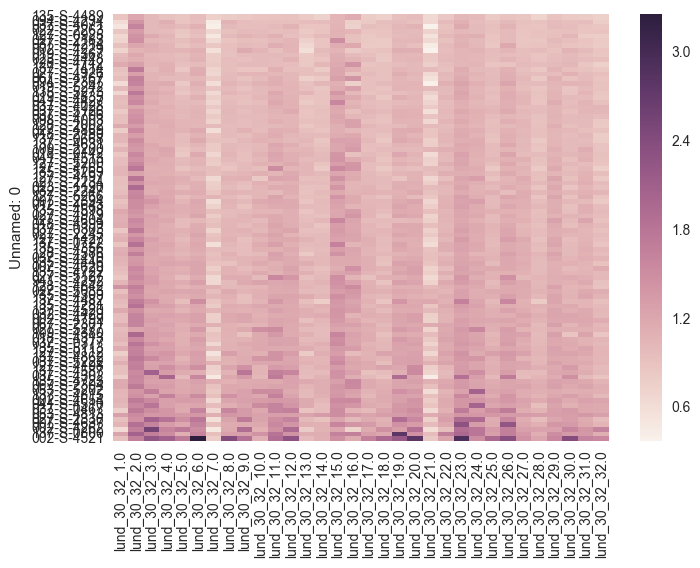

In [5]:
plt.close()
sns.heatmap(rois.loc[jnk.sort_values('sum',axis=0)[:-1].index])
plt.show()

In [6]:
jnk.sort_values('sum',axis=1).columns[:-1]

Index(['lund_30_32_21.0', 'lund_30_32_7.0', 'lund_30_32_13.0',
       'lund_30_32_32.0', 'lund_30_32_1.0', 'lund_30_32_28.0',
       'lund_30_32_14.0', 'lund_30_32_18.0', 'lund_30_32_17.0',
       'lund_30_32_25.0', 'lund_30_32_5.0', 'lund_30_32_22.0',
       'lund_30_32_30.0', 'lund_30_32_8.0', 'lund_30_32_31.0',
       'lund_30_32_9.0', 'lund_30_32_27.0', 'lund_30_32_10.0',
       'lund_30_32_29.0', 'lund_30_32_12.0', 'lund_30_32_20.0',
       'lund_30_32_16.0', 'lund_30_32_19.0', 'lund_30_32_24.0',
       'lund_30_32_6.0', 'lund_30_32_4.0', 'lund_30_32_26.0',
       'lund_30_32_11.0', 'lund_30_32_3.0', 'lund_30_32_23.0',
       'lund_30_32_15.0', 'lund_30_32_2.0'],
      dtype='object')

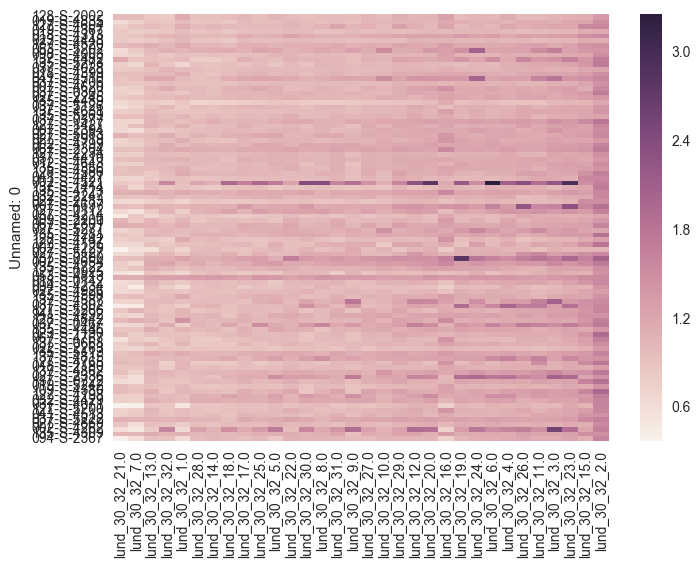

In [7]:
plt.close()
sns.heatmap(rois[jnk.sort_values('sum',axis=1).columns[:-1]])
plt.show()

In [ ]:
sns.heatmap?

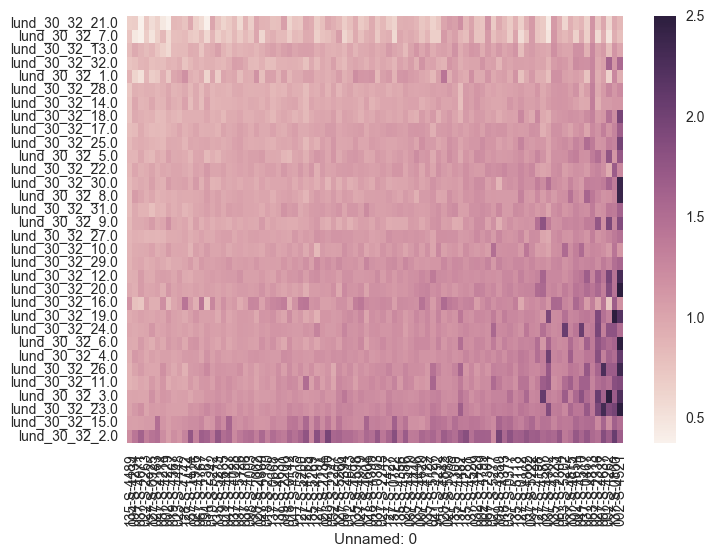

In [8]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(rois.loc[
        jnk.sort_values('sum',axis=0)[:-1].index][
        jnk.sort_values('sum',axis=1).columns[:-1]
        ].transpose(),vmax=2.5)
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/order_by_sub+reg.pdf',
#            bbox_inches='tight')
plt.show()

In [9]:
rois.loc[jnk.sort_values('sum',axis=0)[:-1].index]

,lund_30_32_1.0,lund_30_32_2.0,lund_30_32_3.0,lund_30_32_4.0,lund_30_32_5.0,lund_30_32_6.0,lund_30_32_7.0,lund_30_32_8.0,lund_30_32_9.0,lund_30_32_10.0,...,lund_30_32_23.0,lund_30_32_24.0,lund_30_32_25.0,lund_30_32_26.0,lund_30_32_27.0,lund_30_32_28.0,lund_30_32_29.0,lund_30_32_30.0,lund_30_32_31.0,lund_30_32_32.0
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
135-S-4489,0.897707,1.202645,1.012834,0.915064,0.870080,0.970612,0.755453,0.816147,0.844121,0.889025,...,1.022167,0.992028,0.830596,0.901053,0.874319,0.728782,0.899504,0.828871,0.814746,0.759289
094-S-4234,0.632034,1.431618,1.019103,1.111887,0.879241,0.954941,0.454990,1.081005,0.967713,0.952598,...,1.111262,0.971179,0.920155,1.019826,0.927856,0.918269,0.982895,0.931802,0.974118,0.793973
037-S-4071,0.523416,1.628959,1.014173,1.059766,0.993049,1.097762,0.403049,1.012494,0.961558,0.962246,...,1.184750,0.988498,0.951649,1.088280,0.903318,0.896690,0.998591,0.971157,0.901864,0.874386
022-S-2263,0.868932,1.340929,1.015885,0.978428,0.875243,0.987167,0.691361,0.928993,0.997626,0.978878,...,1.023901,1.009314,0.928572,1.009033,0.882656,0.919114,0.929437,0.938275,0.897918,0.898258
127-S-0925,0.680584,1.441319,1.182135,1.045924,0.847924,0.935808,0.492865,0.988263,1.082114,1.031838,...,1.105721,1.119869,0.896784,1.000775,0.890294,0.914361,0.953734,1.045534,0.799909,0.786511
027-S-2183,0.725649,1.492854,1.041189,1.015415,0.957192,1.055023,0.667407,0.897783,0.958351,0.943097,...,1.081286,1.015128,0.875570,0.999359,0.874821,0.874063,1.012316,0.935827,0.897390,0.819930
037-S-4214,0.924933,1.222916,1.137874,1.055657,0.905078,0.978786,0.855642,0.933628,0.997189,0.972526,...,1.108805,1.026739,0.858736,1.191220,0.886889,0.909079,0.960235,0.908185,0.873056,0.814690
002-S-4229,0.721036,1.074775,1.110966,1.049357,1.064857,1.110817,0.575852,0.951253,1.175047,1.076675,...,1.065947,1.083648,0.978949,1.053676,0.958067,0.985692,0.910033,1.082799,0.989065,0.897699
019-S-4367,0.985231,1.201336,1.030506,1.016262,0.964408,1.044487,0.799125,0.920707,0.989368,0.992673,...,1.044806,1.037811,0.967231,0.972483,0.957746,0.892728,0.964934,1.003750,0.927455,0.873573


In [10]:
rois.sort_values('sum',axis=0,ascending=True).loc[rois.index[:-1]][rois.columns[:-1]]

KeyError: 'sum'

In [26]:
roi_res = pandas.DataFrame(index = rois.columns)
for roi in rois.columns:
    roi_res.ix[roi,'total_tau_r'] = stats.pearsonr(
                                        rois[roi].values,
                                        jnk['sum'].values[:-1])[0]


In [27]:
roi_res.sort_values('total_tau_r',ascending=False)

,total_tau_r
lund_30_32_12.0,0.887639
lund_30_32_25.0,0.886521
lund_30_32_20.0,0.884515
lund_30_32_29.0,0.882038
lund_30_32_31.0,0.881492
lund_30_32_23.0,0.880573
lund_30_32_17.0,0.870870
lund_30_32_30.0,0.861250
lund_30_32_6.0,0.858538
lund_30_32_18.0,0.855850


In [10]:
stats.pearsonr(rois[roi].values,jnk['sum'].values[:-1])

(0.80155592277584242, 2.3252221572537439e-21)

In [28]:
weighted_roi = pandas.DataFrame(rois.values*roi_res.values.transpose(),
                                index=rois.index,columns=rois.columns)

In [29]:
wjnk = deepcopy(weighted_roi)
wjnk['sum'] = weighted_roi.sum(axis=1)
wjnk.loc['sum'] = weighted_roi.sum()

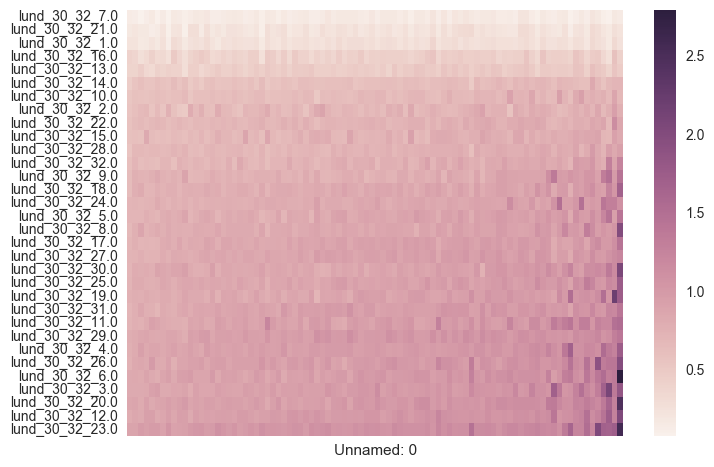

In [30]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(weighted_roi.loc[
        wjnk.sort_values('sum',axis=0)[:-1].index][
        wjnk.sort_values('sum',axis=1).columns[:-1]
        ].transpose(),xticklabels=False)
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/order_by_sub+reg_weighted.pdf',
#            bbox_inches='tight')
plt.show()

In [31]:
bin_rois = deepcopy(rois)
for x in rois.index:
    for y in rois.columns:
        if rois.ix[x,y] < 1.5:
            bin_rois.ix[x,y] = 0

In [32]:
bjnk = deepcopy(bin_rois)
bjnk['sum'] = bin_rois.sum(axis=1)
bjnk.loc['sum'] = bin_rois.sum()

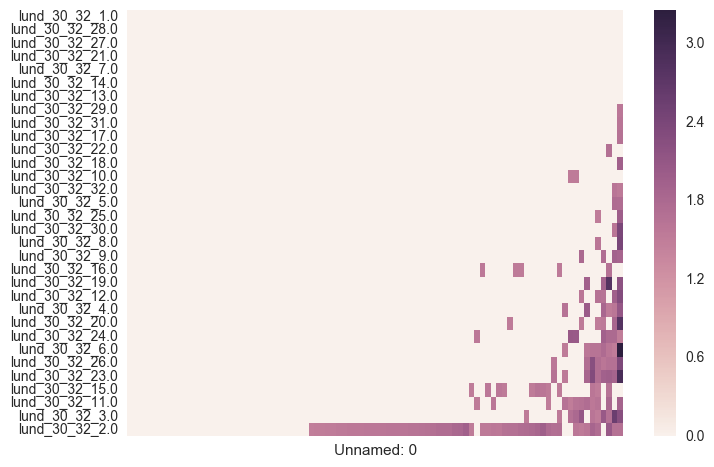

In [33]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(bin_rois.loc[
        bjnk.sort_values('sum',axis=0)[:-1].index][
        bjnk.sort_values('sum',axis=1).columns[:-1]
        ].transpose(),xticklabels=False)
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/ordered_thr1.5.pdf',
#            bbox_inches='tight')
plt.show()

In [34]:
bw_rois = pandas.DataFrame(bin_rois.values*roi_res.values.transpose(),
                                index=rois.index,columns=rois.columns)

In [35]:
bwjnk = deepcopy(bw_rois)
bwjnk['sum'] = bw_rois.sum(axis=1)
bwjnk.loc['sum'] = bw_rois.sum()

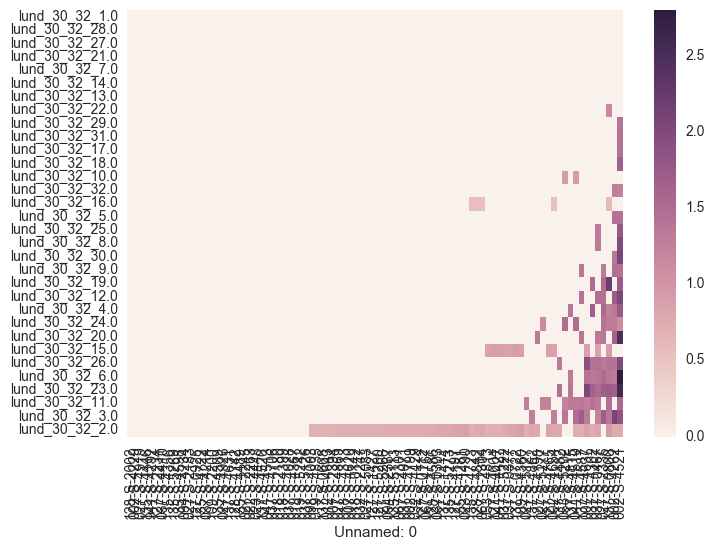

In [36]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(bw_rois.loc[
        bwjnk.sort_values('sum',axis=0)[:-1].index][
        bwjnk.sort_values('sum',axis=1).columns[:-1]
        ].transpose())
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/ordered_thr1.5_weighted.pdf',
#            bbox_inches='tight')
plt.show()

In [10]:
reg_names = ['Medial_Thalamus','Putamen','R_Post_Inf_Temp','PCC','R_PostCentral','L_Temporoparietal', 
     'Junk(LatVent)', 'L_Middle_Frontal', 'R_Angular_Gyrus', 'R_Medial_Occipital', 'Entorinal',
     'R_Anterior_Temp', 'Junk(3rdVent)', 'Sensorimotor', 'Junk(Subcort)', 'Hippocampus/Thalamus', 
     'Superior_Temporal', 'R_Middle_Frontal', 'L_Occipital', 'R_Temporoparietal', 'Caudate',
     'L_Medial_Occipital','L_Inferior_Temp','R_Occipital','Dorsal_Prefrontal',
     'L_Anterior_Temp','TPJ','Precentral','Insula','L_Angular_Gyrus','Medial_Prefrontal',
     'Frontal_Pole']
#full_bin.columns = reg_names

In [11]:
z_rois = deepcopy(rois)
stats.zscore?

In [12]:
z_rois = pandas.DataFrame(stats.zscore(rois),index=rois.index,columns=reg_names)
z_rois

,Medial_Thalamus,Putamen,R_Post_Inf_Temp,PCC,R_PostCentral,L_Temporoparietal,Junk(LatVent),L_Middle_Frontal,R_Angular_Gyrus,R_Medial_Occipital,...,L_Inferior_Temp,R_Occipital,Dorsal_Prefrontal,L_Anterior_Temp,TPJ,Precentral,Insula,L_Angular_Gyrus,Medial_Prefrontal,Frontal_Pole
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
128-S-2002,1.210659,-1.006263,-0.780173,-0.305478,-0.210091,-0.639714,1.149515,-0.561495,-0.583419,-0.757702,...,-0.718078,-0.722333,-0.693763,-0.913970,-0.281178,-0.606998,-0.264001,-0.737774,-0.752761,-1.039869
019-S-4835,0.143233,-0.211639,-0.578458,-0.763788,-0.714692,-0.394318,-0.231052,-0.670626,-0.693272,-0.445954,...,-0.406534,-0.595676,-0.815401,-0.353416,-0.294150,-0.882678,-0.629670,-0.416557,-0.874407,-0.877406
127-S-4604,0.929138,0.097797,-0.204320,-0.035871,-0.611435,-0.684978,0.667805,-0.142134,-0.200536,-0.807623,...,-0.411277,-0.539318,-0.398127,-0.465001,0.087198,-0.009830,1.082247,-0.403735,1.097504,-0.491210
019-S-4367,0.032544,-1.838115,-0.927301,-1.039892,-0.725869,-0.604444,-0.070102,-0.892391,-0.517392,-0.836318,...,-0.951850,-0.807717,-0.615574,-1.116303,-1.209179,-0.978122,-1.562032,-0.413838,-1.286668,-0.743006
018-S-4313,0.575507,0.081829,0.065593,-0.098241,0.155998,0.385969,0.438721,0.015829,0.023828,0.666763,...,0.105514,0.183211,0.151201,0.233565,0.546944,0.324498,0.484109,0.328924,-0.035434,0.494766
023-S-4448,0.355430,-2.214586,-0.826067,-0.987548,-0.620828,-0.451500,-0.037769,-0.637187,-0.692114,-0.827774,...,-0.923039,-0.881177,-0.671852,-0.786685,-1.068346,-0.818486,-1.518375,-0.322706,-0.965325,-0.300685
137-S-4520,1.358760,-0.367807,-0.350149,-0.076800,-0.021132,-0.084423,1.542201,0.240985,0.029989,0.150597,...,-0.121543,-0.033954,0.399531,0.123097,0.466492,0.602793,0.679186,0.187532,0.631237,0.326883
053-S-5202,0.454572,-0.799192,1.564932,0.188752,0.713342,0.141855,0.264411,0.621090,0.903090,3.379540,...,-0.168109,4.026545,1.077611,0.169538,0.526793,1.410984,0.125439,0.164400,0.357817,0.887726
098-S-4003,-0.286937,-0.232007,-0.452697,-0.369311,-0.186366,-0.559803,-0.445609,-0.393241,-0.580140,-0.612659,...,-0.429108,-0.606200,-0.761730,-0.514414,-0.341920,-0.717094,-0.714055,-0.490095,-0.663236,-0.945874


In [13]:
zjnk = deepcopy(z_rois)
zjnk['sum'] = z_rois.sum(axis=1)
zjnk.loc['sum'] = z_rois.sum()

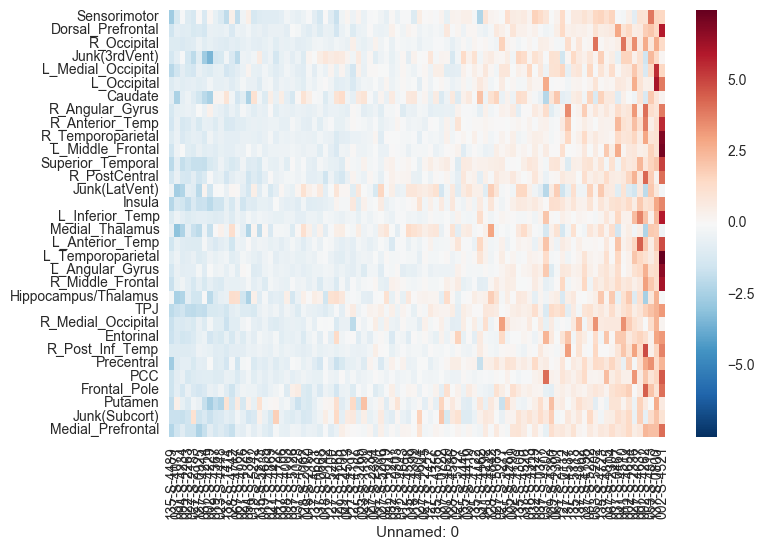

In [14]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(z_rois.loc[
        zjnk.sort_values('sum',axis=0)[:-1].index][
        zjnk.sort_values('sum',axis=1).columns[:-1]
        ].transpose())
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/ordered_thr1.5_weighted.pdf',
#            bbox_inches='tight')
plt.show()

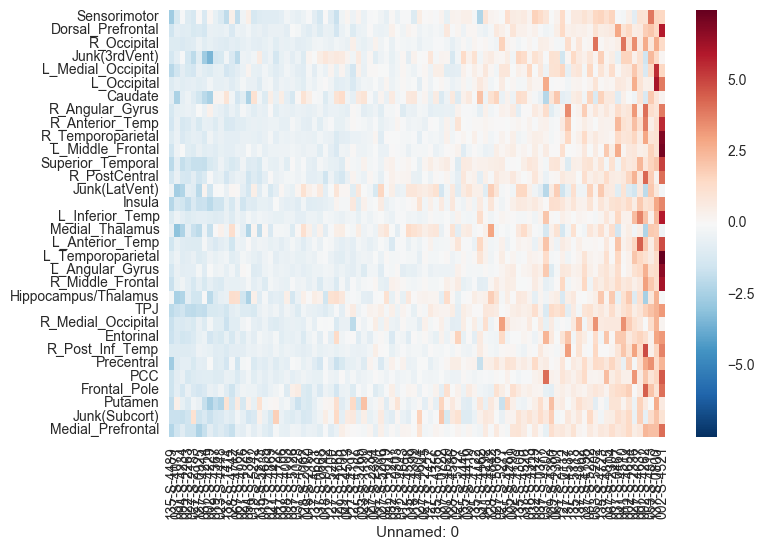

In [26]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(z_rois[
        zjnk.sort_values('sum',axis=1).columns[:-1]].loc[
        zjnk.sort_values('sum',axis=0)[:-1].index].transpose())
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/ordered_thr1.5_weighted.pdf',
#            bbox_inches='tight')
plt.show()

In [15]:
bin_zrois = deepcopy(z_rois)
for x in z_rois.index:
    for y in z_rois.columns:
        if z_rois.ix[x,y] < 1.65:
            bin_zrois.ix[x,y] = 0

In [16]:
zbjnk = deepcopy(bin_zrois)
zbjnk['sum'] = bin_zrois.sum(axis=1)
zbjnk.loc['sum'] = bin_zrois.sum()

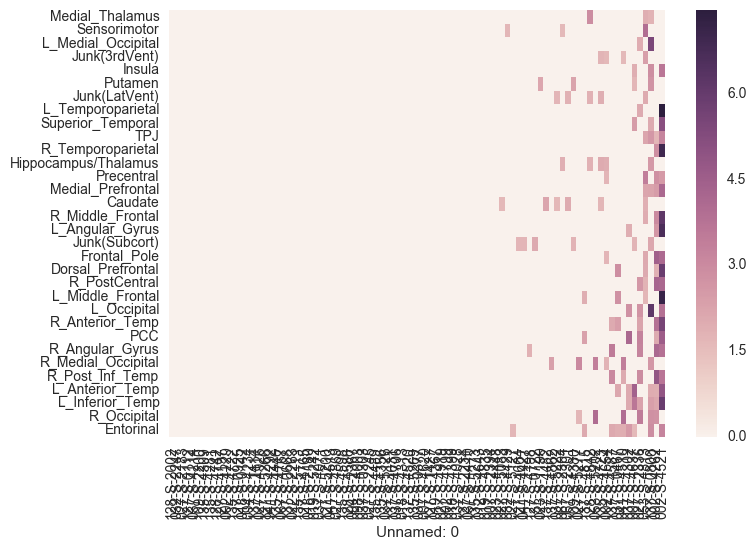

In [17]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(bin_zrois.loc[
        zbjnk.sort_values('sum',axis=0)[:-1].index][
        zbjnk.sort_values('sum',axis=1).columns[:-1]
        ].transpose())
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/ordered_thr1.5_weighted.pdf',
#            bbox_inches='tight')
plt.show()

In [30]:
full_bin = deepcopy(bin_rois)
for x in full_bin.index:
    for y in full_bin.columns:
        if full_bin.ix[x,y] > 0:
            full_bin.ix[x,y] = 1
        else:
            full_bin.ix[x,y] = 0
            

In [31]:
reg_names = ['Medial_Thalamus','Putamen','R_Post_Inf_Temp','PCC','R_PostCentral','L_Temporoparietal', 
     'Junk(LatVent)', 'L_Middle_Frontal', 'R_Angular_Gyrus', 'R_Medial_Occipital', 'Entorinal',
     'R_Anterior_Temp', 'Junk(3rdVent)', 'Sensorimotor', 'Junk(Subcort)', 'Hippocampus/Thalamus', 
     'Superior_Temporal', 'R_Middle_Frontal', 'L_Occipital', 'R_Temporoparietal', 'Caudate',
     'L_Medial_Occipital','L_Inferior_Temp','R_Occipital','Dorsal_Prefrontal',
     'L_Anterior_Temp','TPJ','Precentral','Insula','L_Angular_Gyrus','Medial_Prefrontal',
     'Frontal_Pole']
full_bin.columns = reg_names

In [32]:
fbjnk = deepcopy(full_bin)
fbjnk['sum'] = full_bin.sum(axis=1)
fbjnk.loc['sum'] = full_bin.sum()

In [33]:
jnk = fbjnk.loc['sum']
jnk[:-1].sort_values()


Medial_Thalamus          0.0
Precentral               0.0
TPJ                      0.0
Junk(LatVent)            0.0
Caudate                  0.0
Junk(3rdVent)            0.0
Sensorimotor             0.0
Insula                   1.0
L_Medial_Occipital       1.0
R_Middle_Frontal         1.0
Superior_Temporal        1.0
Medial_Prefrontal        1.0
L_Angular_Gyrus          2.0
Dorsal_Prefrontal        2.0
Frontal_Pole             2.0
R_PostCentral            2.0
R_Medial_Occipital       2.0
L_Middle_Frontal         2.0
L_Occipital              4.0
R_Angular_Gyrus          4.0
R_Anterior_Temp          5.0
Hippocampus/Thalamus     5.0
PCC                      6.0
R_Temporoparietal        6.0
R_Occipital              7.0
L_Temporoparietal        8.0
L_Anterior_Temp          8.0
L_Inferior_Temp          9.0
R_Post_Inf_Temp         11.0
Junk(Subcort)           12.0
Entorinal               12.0
Putamen                 53.0
Name: sum, dtype: float64

In [34]:
roi_order = pandas.DataFrame(jnk)
roi_order.columns = ['percentage']
roi_order = roi_order/len(full_bin)
roi_order['n'] = jnk
roi_order = roi_order.sort_values('percentage',ascending=False)


In [35]:
roi_order['Braak_stage'] = ['IV','n/a','I','III','III','V','IV','IV','IV','V','II/V',
                                 'IV','V','IV','V','VI','V','V','V','V','IV','V','V','VI','V',
                                 'n/a','V','VI','VI','n/a','n/a','n/a','n/a']
roi_order[16:-1]

,percentage,n,Braak_stage
L_Middle_Frontal,0.022222,2.0,V
R_PostCentral,0.022222,2.0,V
Dorsal_Prefrontal,0.022222,2.0,V
Frontal_Pole,0.022222,2.0,V
Insula,0.011111,1.0,IV
Medial_Prefrontal,0.011111,1.0,V
Superior_Temporal,0.011111,1.0,V
L_Medial_Occipital,0.011111,1.0,VI
R_Middle_Frontal,0.011111,1.0,V
Caudate,0.000000,0.0,n/a


In [66]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(roi_order[:-1].sort_values('sum',ascending=False))
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/perc_thr1p5_rois.pdf',
#            bbox_inches='tight')
plt.show()

KeyError: 'sum'

In [36]:
full_zbin = deepcopy(bin_zrois)
for x in full_zbin.index:
    for y in full_zbin.columns:
        if full_zbin.ix[x,y] > 0:
            full_zbin.ix[x,y] = 1
        else:
            full_zbin.ix[x,y] = 0
            

In [40]:
fzbjnk = deepcopy(full_zbin)
fzbjnk['sum'] = full_zbin.sum(axis=1)
fzbjnk.loc['sum'] = full_zbin.sum()

In [41]:
fzbjnk = deepcopy(full_zbin)
fzbjnk['sum'] = full_zbin.sum(axis=1)
fzbjnk.loc['sum'] = full_zbin.sum()

In [18]:
from sklearn import cluster

In [45]:
bw_rois

,lund_30_32_1.0,lund_30_32_2.0,lund_30_32_3.0,lund_30_32_4.0,lund_30_32_5.0,lund_30_32_6.0,lund_30_32_7.0,lund_30_32_8.0,lund_30_32_9.0,lund_30_32_10.0,...,lund_30_32_23.0,lund_30_32_24.0,lund_30_32_25.0,lund_30_32_26.0,lund_30_32_27.0,lund_30_32_28.0,lund_30_32_29.0,lund_30_32_30.0,lund_30_32_31.0,lund_30_32_32.0
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
128-S-2002,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
019-S-4835,0.0,0.696262,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
127-S-4604,0.0,0.723034,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
019-S-4367,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
018-S-4313,0.0,0.721652,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
023-S-4448,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
137-S-4520,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
053-S-5202,0.0,0.000000,1.378836,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.940190,...,0.000000,1.500405,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
098-S-4003,0.0,0.694499,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


In [21]:
tst_smtx = poormans_basc(bw_rois,6,100,10)
tst_smtx

NameError: name 'bw_rois' is not defined

In [39]:
import sys
sys.path.insert(0,'/Users/jakevogel/git/data_driven_pathology/')
import vogel_basc as vb

In [20]:
def poormans_basc(in_mtx,n_clust,n_iter,checker,return_mtx = False):
    clust_mtx = pandas.DataFrame(index=in_mtx.index)
    print('running cluster analyses')
    for i in range(n_iter):
        if i%checker == 0:
            print('working on iteration',i)
        clust_mtx.ix[:,'i%s'%i] = cluster.k_means(in_mtx,n_clust)[1]
    print('creating stability matrix')
    id_mtx = np.zeros((len(clust_mtx),len(clust_mtx)))
    for i in range(n_iter):
        if i%checker == 0:
            print('working on iteration',i)
        icol = pandas.Series(clust_mtx.values[:,i])
        for u in np.unique(icol):
            id_mtx[[x[0] for x in itertools.combinations(icol[icol==u].index.tolist(),2)],[
                    y[1] for y in itertools.combinations(icol[icol==u].index.tolist(),2)]] += 1
    stab_mtx = id_mtx/n_iter
    
    stab_mtx[np.tril_indices_from(stab_mtx)] = stab_mtx.transpose()[
                                            np.tril_indices_from(stab_mtx)]
    
    plt.close
    sns.clustermap(stab_mtx)
    plt.show()
    
    aggclust = cluster.AgglomerativeClustering(6,connectivity=tst_smtx).fit(tst_smtx)
    if not return_mtx:
        return aggclust.labels_, stab_mtx
    else:
        newdf = deepcopy(in_mtx)
        newdf.ix[:,'order'] = aggclust.labels_
    
        return stab_mtx, newdf
    

running cluster analyses
working on iteration 0
working on iteration 10
working on iteration 20
working on iteration 30
working on iteration 40
working on iteration 50
working on iteration 60
working on iteration 70
working on iteration 80
working on iteration 90
creating stability matrix
working on iteration 0
working on iteration 10
working on iteration 20
working on iteration 30
working on iteration 40
working on iteration 50
working on iteration 60
working on iteration 70
working on iteration 80
working on iteration 90


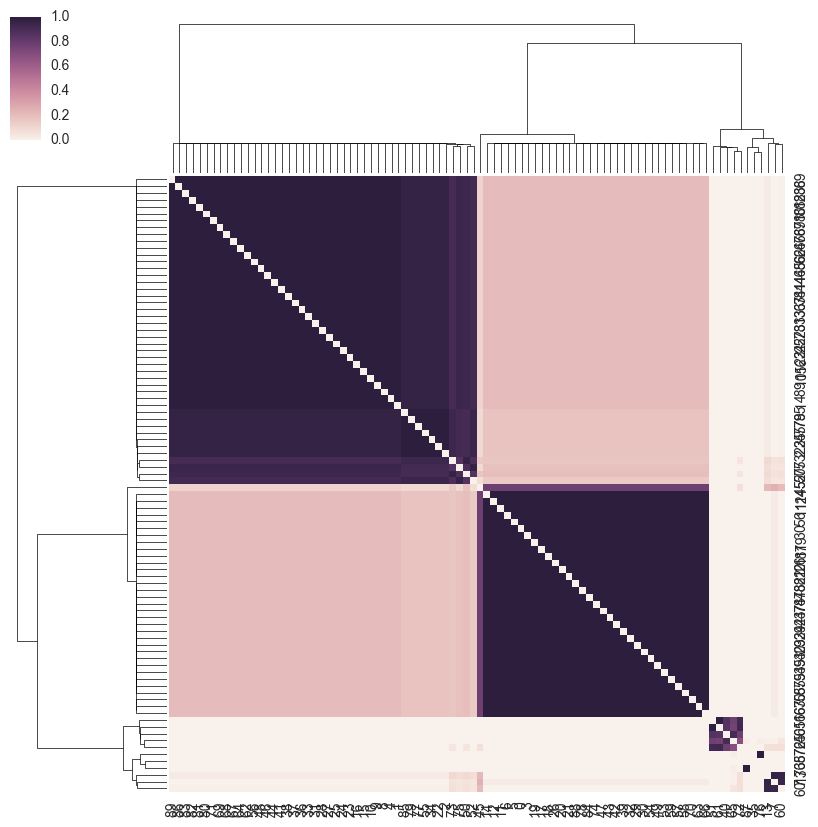

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


In [40]:
smtx, new_mtx = vb.poormans_basc(bw_rois,6,100,10,return_mtx=True)

In [205]:
sns.clustermap?

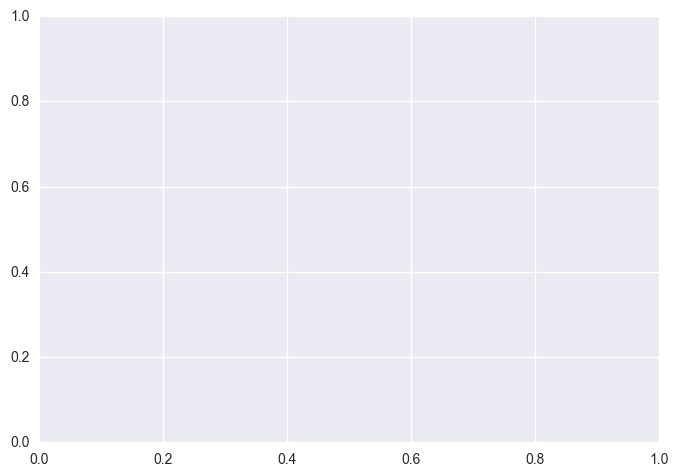

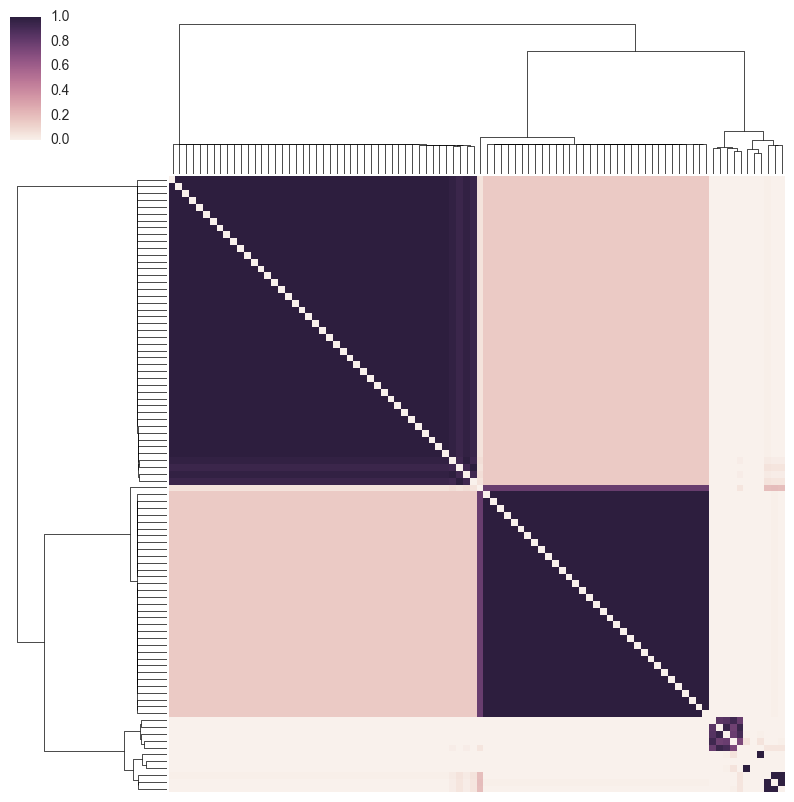

In [211]:
plt.close()
fig, ax = plt.subplots()
fig = sns.clustermap(smtx,xticklabels=False,yticklabels=False)
fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/stab_mtx_cluster.pdf',
            bbox_inches='tight')
plt.show()

In [41]:
new_mtx.columns = reg_names + ['order']

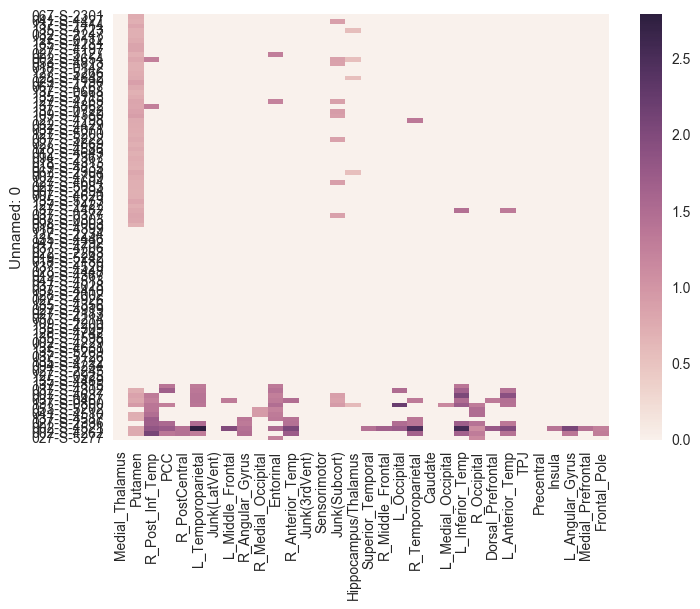

In [43]:
plt.close()
sns.heatmap(new_mtx.sort_values('order')[new_mtx.columns[:-1]])
plt.show()

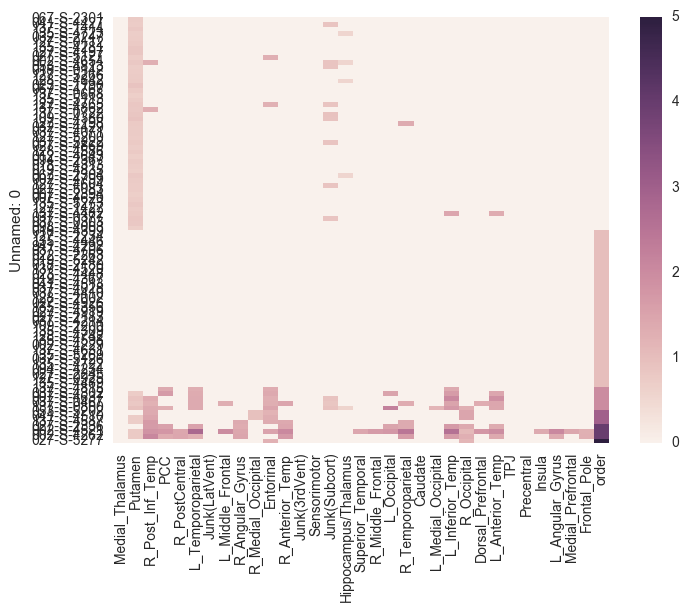

In [44]:
plt.close()
sns.heatmap(new_mtx.sort_values('order'))
plt.show()

In [45]:
converter = {0:2, 1:1, 5:3, 3:4, 2:5, 4:6}
new_mtx_reorder = deepcopy(new_mtx)
new_mtx_reorder.columns = reg_names+['cluster']
new_mtx_reorder.ix[:,'cluster'] = [converter[x] for x in new_mtx_reorder.cluster.values]

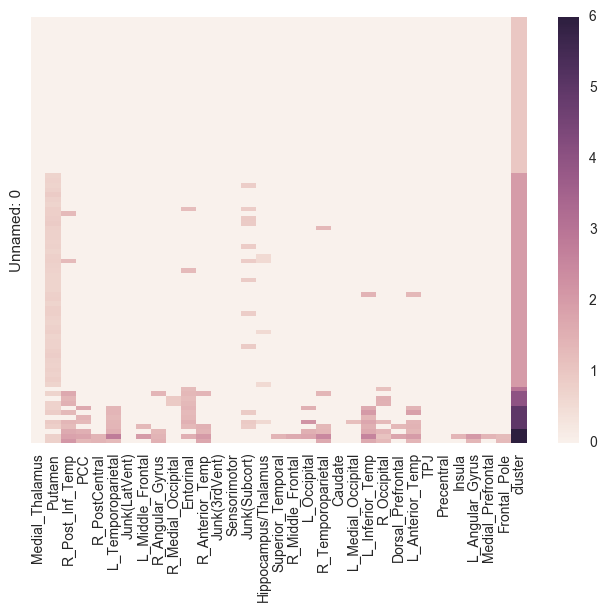

In [48]:
plt.close()
fig, ax = plt.subplots()
sns.heatmap(new_mtx_reorder.sort_values('cluster'),yticklabels=False)
#fig.savefig('/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters/basc_i100_6_mtx.pdf',
#            bbox_inches='tight')
plt.show()

In [172]:
def create_cluster_images(subdir, membership, outdir, outnm=''):
    
    unis = np.unique(membership.values)
    for cluster in unis:
        print('working on cluster',cluster)
        c_subs = membership[membership==cluster].index
        c_scans = [glob(os.path.join(subdir,'*%s*'%(x)))[0] for x in c_subs]
        aff = ni.load(c_scans[0]).affine
        for i,scan in enumerate(c_scans):
            dat = ni.load(scan).get_data()
            if i == 0:
                c_image = dat
            else:
                c_image = c_image + dat
        c_image = c_image / len(c_scans)
        newfl = os.path.join(outdir,'%s_cluster%s'%(outnm,cluster))
        nimg = ni.Nifti1Image(c_image,aff)
        nimg.to_filename(newfl)
        print('wrote cluster %s to %s'%(cluster,newfl))
        

In [51]:
subdir = '/Users/jakevogel/Science/tmp/tau/'
membership = new_mtx['order']
outdir = '/Users/jakevogel/Science/tmp/tau/progression/ADNI_prog_clusters'
outnm = 'basc6'
#create_cluster_images(subdir,membership,outdir,outnm)

In [52]:
membership[membership==4].count()

3

In [53]:
df = pandas.read_csv('/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv')

In [54]:
df['subs'].values  == membership.index.sort_values()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [55]:
df.index = df['subs'].values
df['kmeans6_membership'] = membership.sort_index().values

In [56]:
converter = {0:2, 1:1, 5:3, 3:4, 2:5, 4:6}
df['kmeans6_membership'] = [converter[x] for x in df['kmeans6_membership'].values]

In [215]:
sns.barplot?

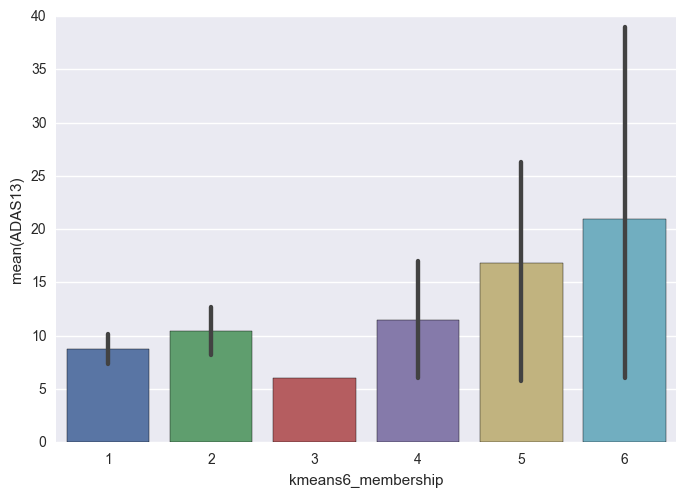

In [91]:
plt.close()
sns.barplot('kmeans6_membership','ADAS13',data=df)
plt.show()


In [92]:
stats.f_oneway(df[df.kmeans6_membership==1]['ADAS13'].dropna(),
              df[df.kmeans6_membership==2]['ADAS13'].dropna(),
               df[df.kmeans6_membership==3]['ADAS13'].dropna(),
               df[df.kmeans6_membership==4]['ADAS13'].dropna(),
               df[df.kmeans6_membership==4]['ADAS13'].dropna(),
               df[df.kmeans6_membership==5]['ADAS13'].dropna()
)

F_onewayResult(statistic=1.2360708546614481, pvalue=0.29983996438389854)

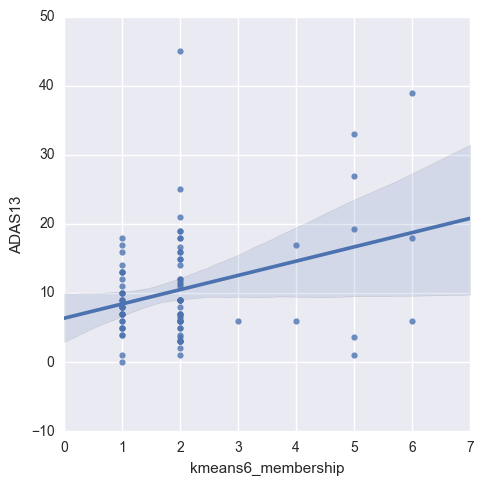

In [93]:
plt.close()
sns.lmplot('kmeans6_membership','ADAS13',data=df)
plt.show()

In [94]:
stats.spearmanr(df.loc[df[pandas.notnull(df.CDRSB)].index]['ADAS13'],
               df.loc[df[pandas.notnull(df.CDRSB)].index]['kmeans6_membership']
               )

SpearmanrResult(correlation=0.10801993753620966, pvalue=0.31645804903945923)

In [61]:
stats.f_oneway?

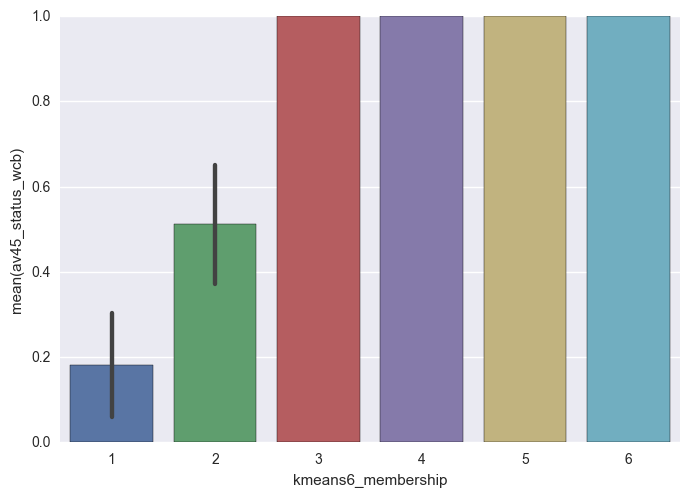

In [196]:
plt.close()
sns.barplot('kmeans6_membership','av45_status_wcb',data=df)
plt.show()

In [74]:
stats.f_oneway(df[df.kmeans6_membership==1]['av45_status_wcb'].dropna(),
              df[df.kmeans6_membership==2]['av45_status_wcb'].dropna(),
               df[df.kmeans6_membership==3]['av45_status_wcb'].dropna(),
               df[df.kmeans6_membership==4]['av45_status_wcb'].dropna(),
               df[df.kmeans6_membership==4]['av45_status_wcb'].dropna(),
               df[df.kmeans6_membership==5]['av45_status_wcb'].dropna()
)

F_onewayResult(statistic=6.0687754987984137, pvalue=8.0400679810966962e-05)

In [95]:
stats.ttest_ind(df[df.av45_status_wcb==0]['kmeans6_membership'],
               df[df.av45_status_wcb==1]['kmeans6_membership'],)

Ttest_indResult(statistic=-5.1785541000560231, pvalue=1.4792320030569161e-06)

In [81]:
stats.chisquare?

In [82]:
stats.chisquare(df[df.av45_status_wcb==0]['kmeans6_membership'],
              df[df.av45_status_wcb==1]['kmeans6_membership']
)

ValueError: operands could not be broadcast together with shapes (48,) (39,) 

In [101]:
ct.kmeans6_membership = ct.kmeans6_membership.astype(int)

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [109]:
true_ct = ct.pivot_table(values='kmeans6_membership', columns= 'DX_final')

In [121]:
stats.chi2_contingency(
        pandas.crosstab(index = ct['DX_final'], columns=ct['kmeans6_membership']))

(17.500737100737101,
 0.063992584100636324,
 10,
 array([[  3.66666667,   5.        ,   0.11111111,   0.33333333,
           0.55555556,   0.33333333],
        [ 13.56666667,  18.5       ,   0.41111111,   1.23333333,
           2.05555556,   1.23333333],
        [ 15.76666667,  21.5       ,   0.47777778,   1.43333333,
           2.38888889,   1.43333333]]))

In [110]:
stats.chi2_contingency(true_ct)

(0.0, 1.0, 0, array([ 3.2       ,  1.97297297,  1.76744186]))

In [86]:
ct = df[['DX_final','kmeans6_membership']]

In [87]:
nct = pandas.crosstab(index=ct.DX_final,columns=ct.kmeans6_membership)
nct_pct = (nct / nct.sum()).transpose()

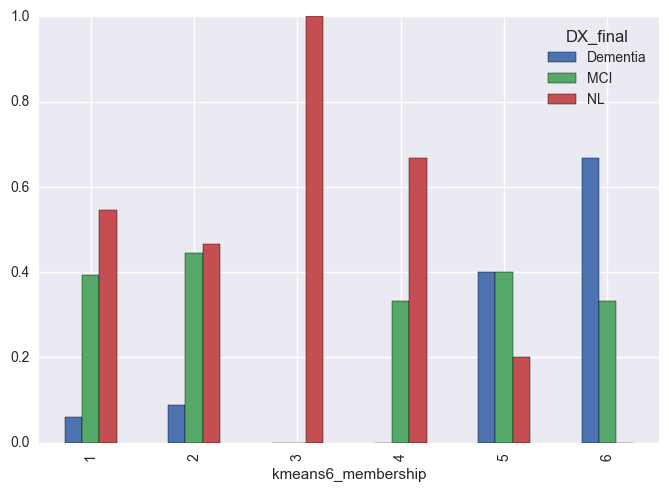

In [90]:
plt.close
nct_pct.plot.bar()
plt.show()

In [85]:
stats.chi2_contingency?

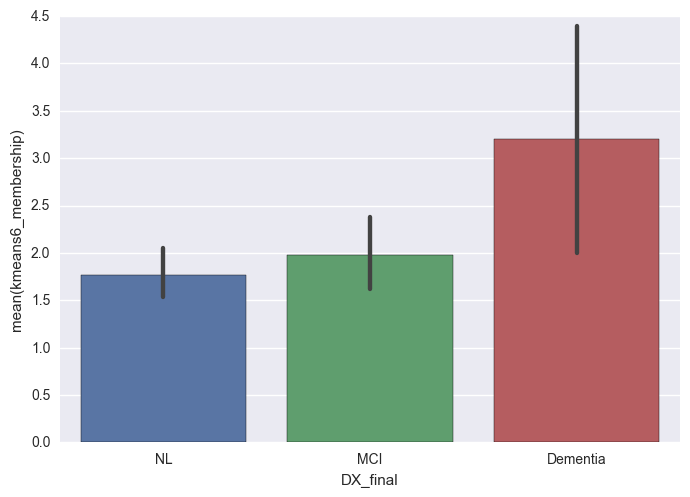

In [83]:
plt.close()
sns.barplot('DX_final','kmeans6_membership',data=df,order=['NL','MCI','Dementia'])
plt.show()

In [122]:
stats.f_oneway(df[df.DX_final=='NL']['kmeans6_membership'].dropna(),
              df[df.DX_final=='MCI']['kmeans6_membership'].dropna(),
               df[df.DX_final=='Dementia']['kmeans6_membership'].dropna()
               )

F_onewayResult(statistic=5.9572243108156018, pvalue=0.0037608762228844082)

In [236]:
parts = ['Pierre','Jake','Julie','Alexa','Melissa','Hazal','Christophe','Etienne','Sylvia']
beds = ['Bed1','Bed2','Bed3','Couch','Airmattress','Fouton','Shed']
beds = beds+beds

In [242]:
final = np.random.permutation(parts)
list(zip(final,beds))

[('Julie', 'Bed1'),
 ('Alexa', 'Bed2'),
 ('Sylvia', 'Bed3'),
 ('Melissa', 'Couch'),
 ('Jake', 'Airmattress'),
 ('Pierre', 'Fouton'),
 ('Christophe', 'Shed'),
 ('Hazal', 'Bed1'),
 ('Etienne', 'Bed2')]

In [125]:
smtx, new_mtx = vb.poormans_basc(zbjnk,6,100,10,return_mtx=True)

running cluster analyses
working on iteration 0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').